# The Classics of Machine Learning Classification

**Classifier**: Algorithm that maps input data to a category (e.g., rock type, terrain type).

Classification is (generally) a supervised learning task where we train a model to predict discrete class labels based on input features. Common applications might include:
- Rock/mineral type classification from spectral data
- Terrain classification from satellite image data 
- Phylogenetic classificaton from genetic data

The key components of classification are:
1. Features $(X)$: Measurable properties of our samples (e.g., chemical elements, spectral bands)  
    a. features can be continuous or categorical in some classifiers, which is useful sometimes. 
2. Labels $(y)$: The classes we want to predict (e.g., rock types, terrain type, etc. Can also be continuous or categorical)
3. Training data: Known examples used to teach the model
4. Test data: Held-out examples used to evaluate model performance
5. Training: Process of adjusting model parameters to predict labels from features.

**Popular classifiers:**
1. Logistic Regression
2. k-Nearest Neighbors (k-NN)
3. Support Vector Machines (SVM)
4. Random Forest


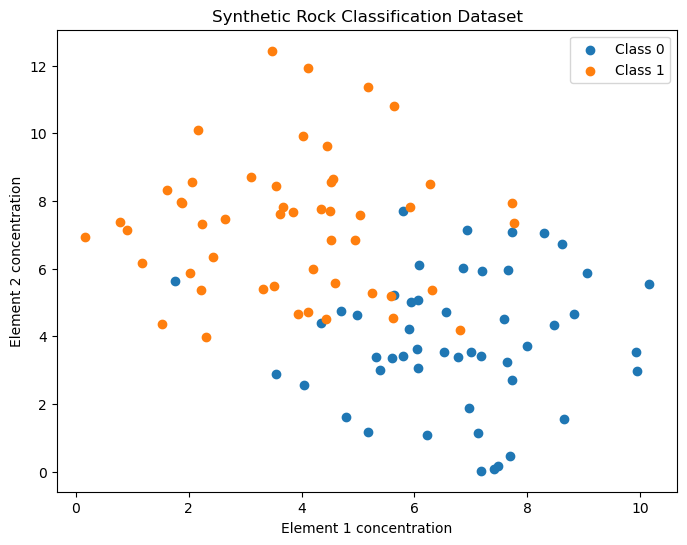

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

# Let's create a simple synthetic dataset to demonstrate classification
# We'll generate two classes of rocks based on two chemical elements
np.random.seed(42)

# ----------------- Simple Synthetic Data Generation -----------------
n_samples = 100
# Class 1: High in feature 1, low in feature 2 (increase std dev for more overlap)
X1 = np.random.normal(loc=[7, 4], scale=[2, 2], size=(n_samples//2, 2))
# Class 2: Low in feature 1, high in feature 2 (increase std dev for more overlap)
X2 = np.random.normal(loc=[4, 7], scale=[2, 2], size=(n_samples//2, 2))
X = np.vstack([X1, X2])
y = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])
# ---------------------------------------------------------------

# ----------------- More Complex Synthetic Data Generation -----------------
# X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
# -------------------------------------------------------------------------

# Plot the data
plt.figure(figsize=(8,6))
plt.scatter(X[y==0,0], X[y==0,1], label='Class 0')
plt.scatter(X[y==1,0], X[y==1,1], label='Class 1')
plt.xlabel('Element 1 concentration')
plt.ylabel('Element 2 concentration')
plt.legend()
plt.title('Synthetic Rock Classification Dataset')
plt.show()

# Data Preprocessing

Before training models, we typically:
1. Split data into training and test sets
2. Scale features to have similar ranges
3. Handle any missing values or outliers

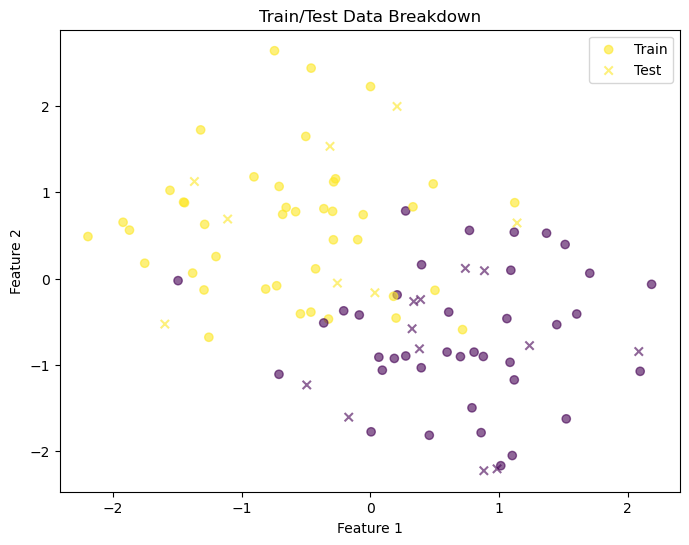

In [3]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Plot the train/test breakdown of the data
plt.figure(figsize=(8, 6))

# Plot training data
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis', marker='o', label='Train', alpha=0.6)

# Plot test data
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='viridis', marker='x', label='Test', alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Train/Test Data Breakdown')
plt.legend()
plt.show()

# Common Classification Algorithms

## 1. Logistic Regression
- Linear classifier that models probability of class membership
- Works well for linearly separable classes
- Fast and interpretable

In [4]:
# Train logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.9


## 2. K-Nearest Neighbors (KNN)
- Classifies based on majority vote of K nearest training examples
- Non-parametric, works well with non-linear boundaries
- Sensitive to feature scaling


In [8]:
# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

KNN Accuracy: 0.9


## 3. Support Vector Machine (SVM)
- Finds optimal hyperplane to separate classes
- Can handle non-linear boundaries using kernels
- Works well in high dimensions

In [9]:
# Train SVM
svm_model = SVC(kernel='rbf') # kernel options ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']]
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

SVM Accuracy: 0.95


## 4. Random Forest
- Ensemble of decision trees
- Handles non-linear relationships and feature interactions
- Less prone to overfitting than single decision trees
- Can measure feature importance

In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(criterion = 'gini', n_estimators=100) # criterion options ['gini', 'entropy', log_loss']
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.95


# Model Evaluation

We can evaluate classifiers using various metrics:
- Accuracy: Overall correct predictions
- Precision: True positives / (True positives + False positives)
- Recall: True positives / (True positives + False negatives)
- F1-score: Harmonic mean of precision and recall

In [14]:
# Compare model performance
models = {
    'Logistic Regression': lr_model,
    'KNN': knn_model,
    'SVM': svm_model,
    'Random Forest': rf_model
}

for name, model in models.items():
    predictions = model.predict(X_test_scaled)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, predictions))  # classification report elements:
                                                       #
                                                       # Precision
                                                       # Recall
                                                       # F1-Score
                                                       # Support: The number of actual occurrences of each class in the dataset. 
                                                       #          It helps to understand the distribution of the classes in the dataset.
                                                       #
                                                       # Accuracy: Overall accuracy of the classifier
                                                       #    [ Accuracy = (True Positives + True Negatives) / Total Samples ]
                                                       #
                                                       # Macro Average: The unweighted mean of the precision, recall, and F1-score for each class. 
                                                       #                It treats all classes equally, regardless of their support.
                                                       # [ Macro Average = (Precision_1 + Precision_2 + ... + Precision_n) / n ] (Similarly for recall and F1-score)
                                                       #
                                                       # Weighted Average: This is the mean of the precision, recall, and F1-score for each class, 
                                                       #                   weighted by the number of true instances for each class (support). 
                                                       #                   It accounts for class imbalance by giving more importance to classes with more samples.
                                                       # [ Weighted Average = (Support_1 * Precision_1 + Support_2 * Precision_2 + ... + Support_n * Precision_n) / Total Support ] (Similarly for recall and F1-score)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        12
         1.0       1.00      0.75      0.86         8

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20


KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        12
         1.0       1.00      0.75      0.86         8

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20


SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        12
         1.0       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96     

# Visualizing Decision Boundaries

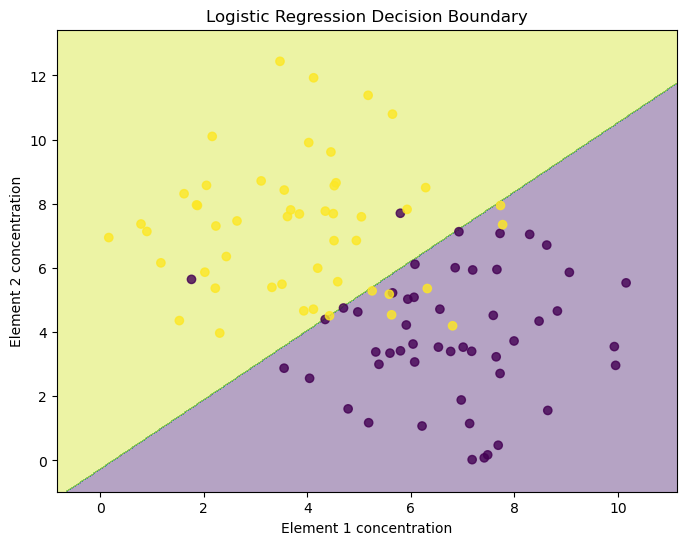

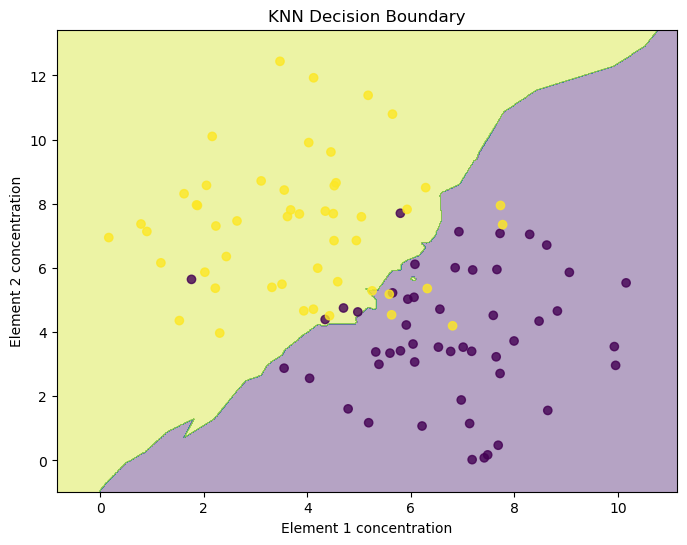

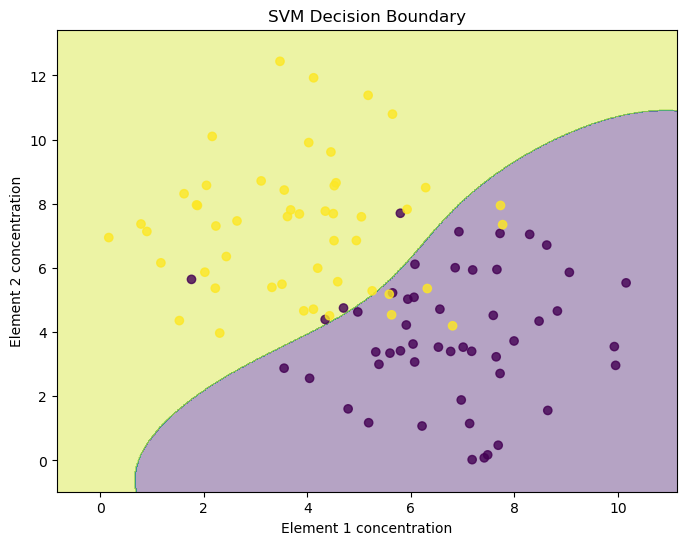

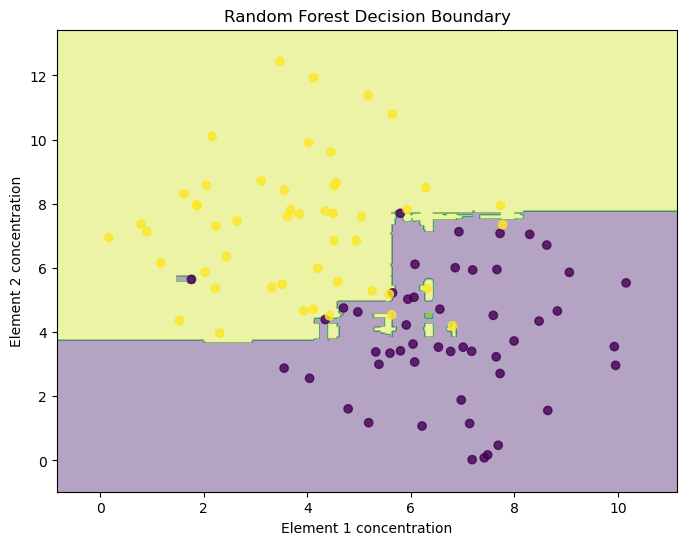

In [15]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel('Element 1 concentration')
    plt.ylabel('Element 2 concentration')
    plt.title(title)
    plt.show()

# Plot decision boundaries for each model
for name, model in models.items():
    plot_decision_boundary(model, X, y, f"{name} Decision Boundary")

# A slightly more realistic dataset

In [16]:
# Data handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# %%
# Load dataset (Wine dataset as analog for rock/mineral classification)
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target_names[data.target])

print(f"Features: {X.shape[1]}, Samples: {X.shape[0]}")
print("Classes:", y.unique())
X.head()


Features: 13, Samples: 178
Classes: ['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Preprocessing
- Split data into training/test sets
- Scale features (critical for SVM/k-NN)

In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (normalize values so that they're within a reasonable range of each other)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Why scale the data?

/var/folders/fz/2g6_hdjd4yndg54gmwq1402c0000gn/T/ipykernel_23774/652225901.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_classes))


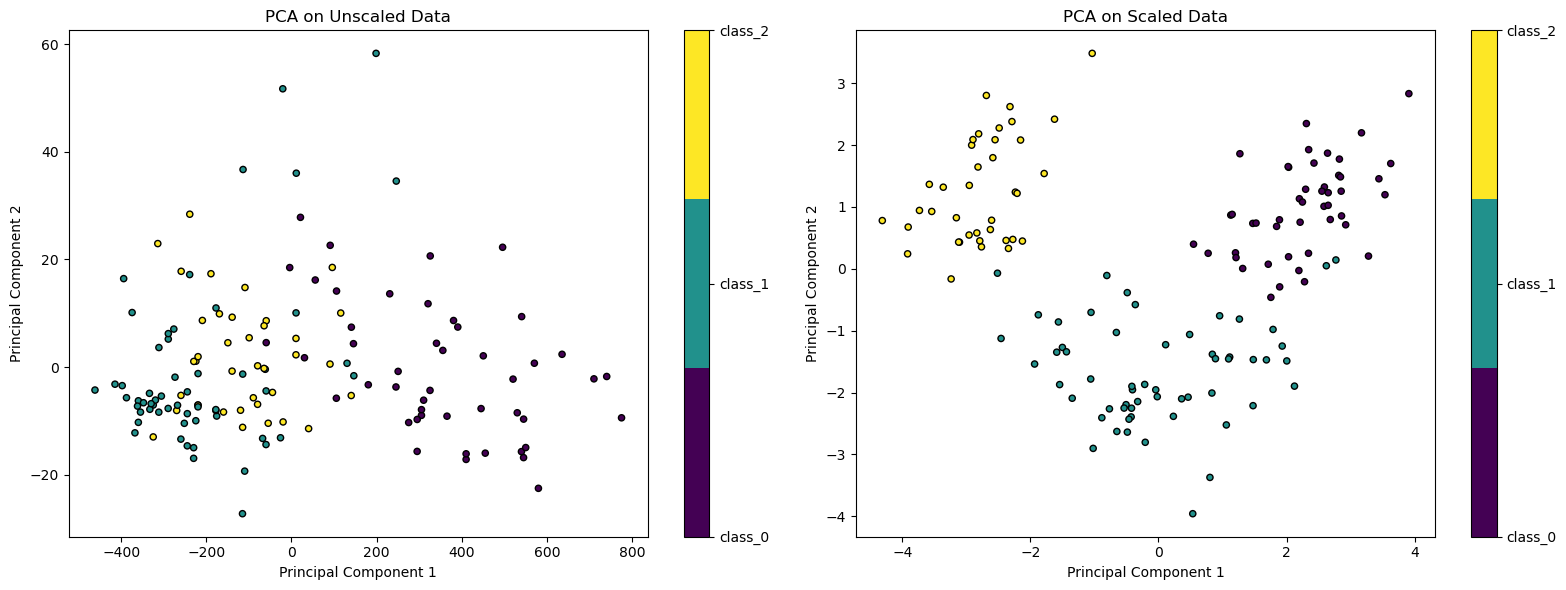

In [18]:
from sklearn.decomposition import PCA

# Perform PCA on scaled data
pca_scaled = PCA(n_components=2)
X_pca_scaled = pca_scaled.fit_transform(X_train_scaled)

# Perform PCA on unscaled data
pca_unscaled = PCA(n_components=2)
X_pca_unscaled = pca_unscaled.fit_transform(X_train)

# Convert class labels to numeric codes
y_train_codes = y_train.astype('category').cat.codes

# Get unique class labels and their corresponding colors
unique_classes = y_train.astype('category').cat.categories
colors = plt.cm.get_cmap('viridis', len(unique_classes))

# Plot the PCA results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot PCA on unscaled data
scatter1 = axes[0].scatter(X_pca_unscaled[:, 0], X_pca_unscaled[:, 1], c=y_train_codes, cmap=colors, edgecolor='k', s=20)
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].set_title('PCA on Unscaled Data')
cbar1 = fig.colorbar(scatter1, ax=axes[0], ticks=range(len(unique_classes)))
cbar1.ax.set_yticklabels(unique_classes)

# Plot PCA on scaled data
scatter2 = axes[1].scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=y_train_codes, cmap=colors, edgecolor='k', s=20)
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].set_title('PCA on Scaled Data')
cbar2 = fig.colorbar(scatter2, ax=axes[1], ticks=range(len(unique_classes)))
cbar2.ax.set_yticklabels(unique_classes)

plt.tight_layout()
plt.show()


## Classifier 1: Logistic Regression
- **What it does**: Fitts a decision boundary between classes
- **Use Case**: Baseline model for linearly separable data

Accuracy: 0.97


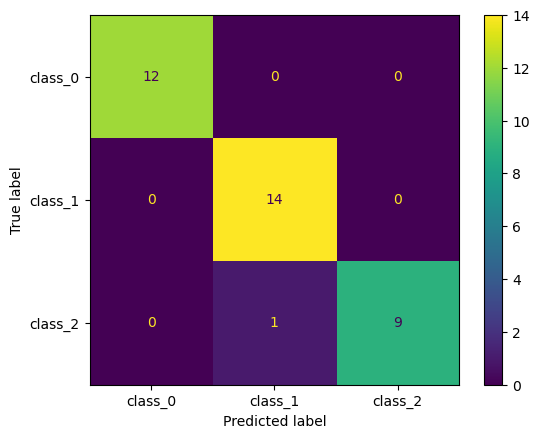

In [19]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## Classifier 2: k-Nearest Neighbors (k-NN)
- **What it does**: Classifies samples by majority vote of nearest neighbors
- **Use Case**: Localized patterns (e.g., identifying mineral clusters)

Accuracy: 0.97


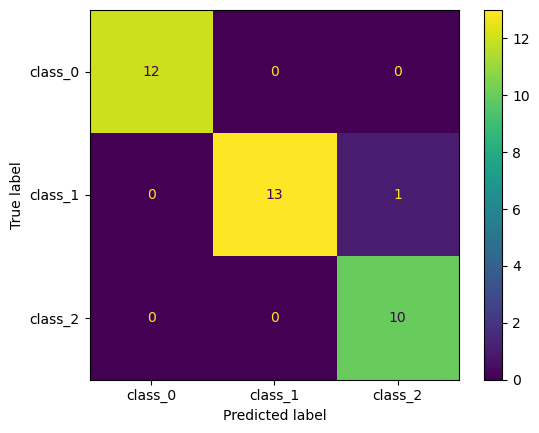

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## Classifier 3: Support Vector Machine (SVM)
- **What it does**: Finds optimal hyperplane to separate classes
- **Use Case**: High-dimensional data 

Accuracy: 0.97


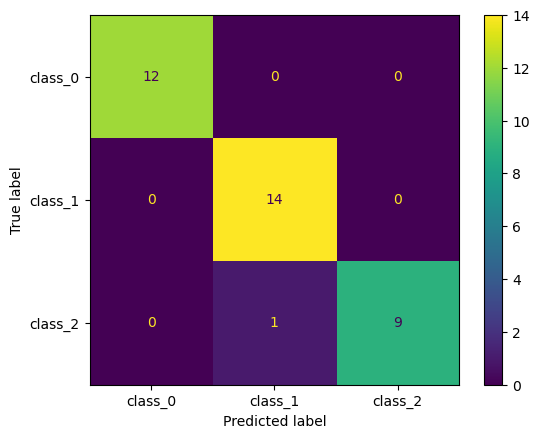

In [21]:
svm = SVC(kernel='rbf', C=1.0)  # Radial basis function kernel
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## Classifier 4: Random Forest
- **What it does**: Average of committee of decision trees voting on class
- **Use Case**: Complex relationships (good with mixtures of types of data)

Accuracy: 1.00


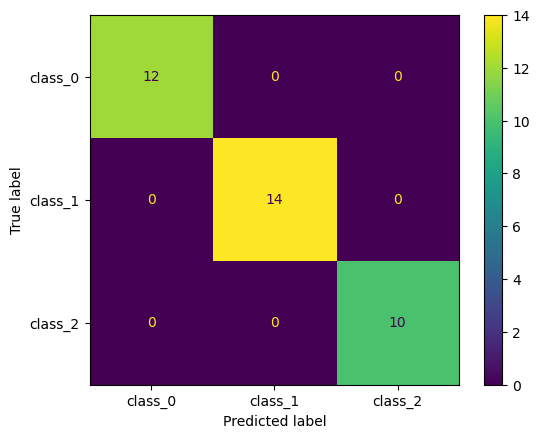

In [22]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf.fit(X_train, y_train)  # No scaling needed for tree-based methods
y_pred = rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## Model Comparison
Evaluate all classifiers

In [23]:
models = {
    "Logistic Regression": lr,
    "k-NN": knn,
    "SVM": svm,
    "Random Forest": rf
}

results = []
for name, model in models.items():
    if "Forest" in name:
        pred = model.predict(X_test)  # Use unscaled data for RF
    else:
        pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, pred)
    results.append((name, acc))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df.sort_values("Accuracy", ascending=False)

,Model,Accuracy
3,Random Forest,1.000000
0,Logistic Regression,0.972222
1,k-NN,0.972222
2,SVM,0.972222


# Plot decision boundaries

/var/folders/fz/2g6_hdjd4yndg54gmwq1402c0000gn/T/ipykernel_23774/2504280038.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', n_classes)


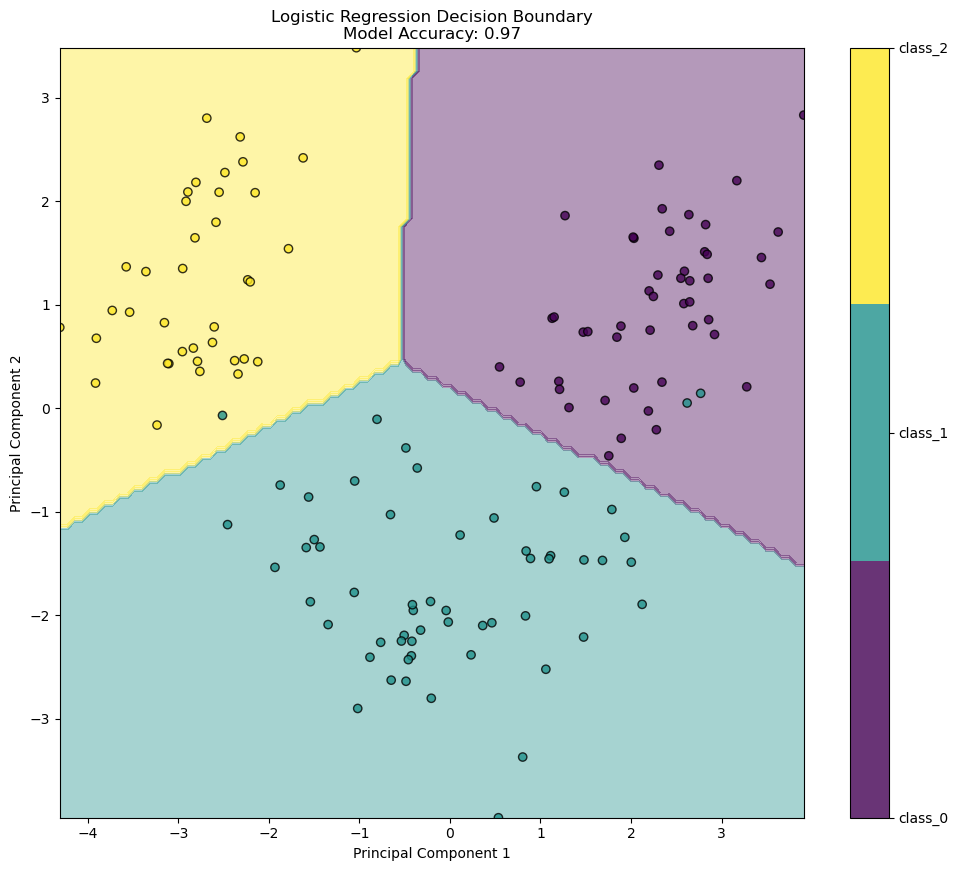

/var/folders/fz/2g6_hdjd4yndg54gmwq1402c0000gn/T/ipykernel_23774/2504280038.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', n_classes)


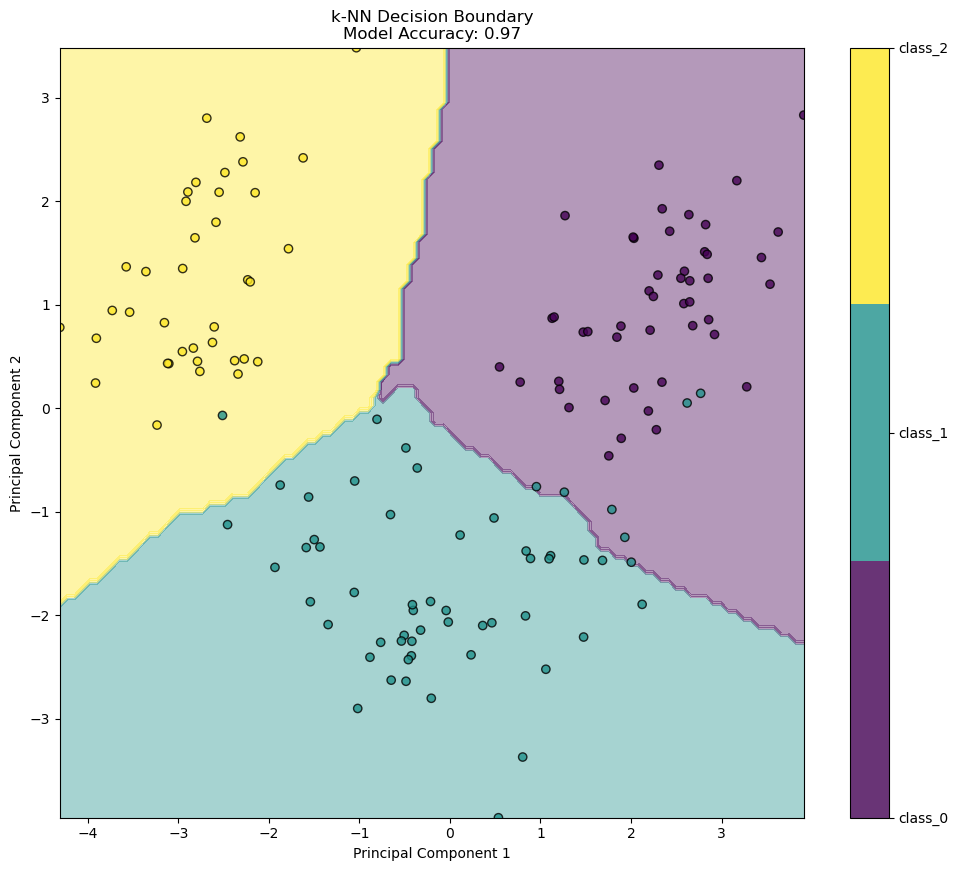

/var/folders/fz/2g6_hdjd4yndg54gmwq1402c0000gn/T/ipykernel_23774/2504280038.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', n_classes)


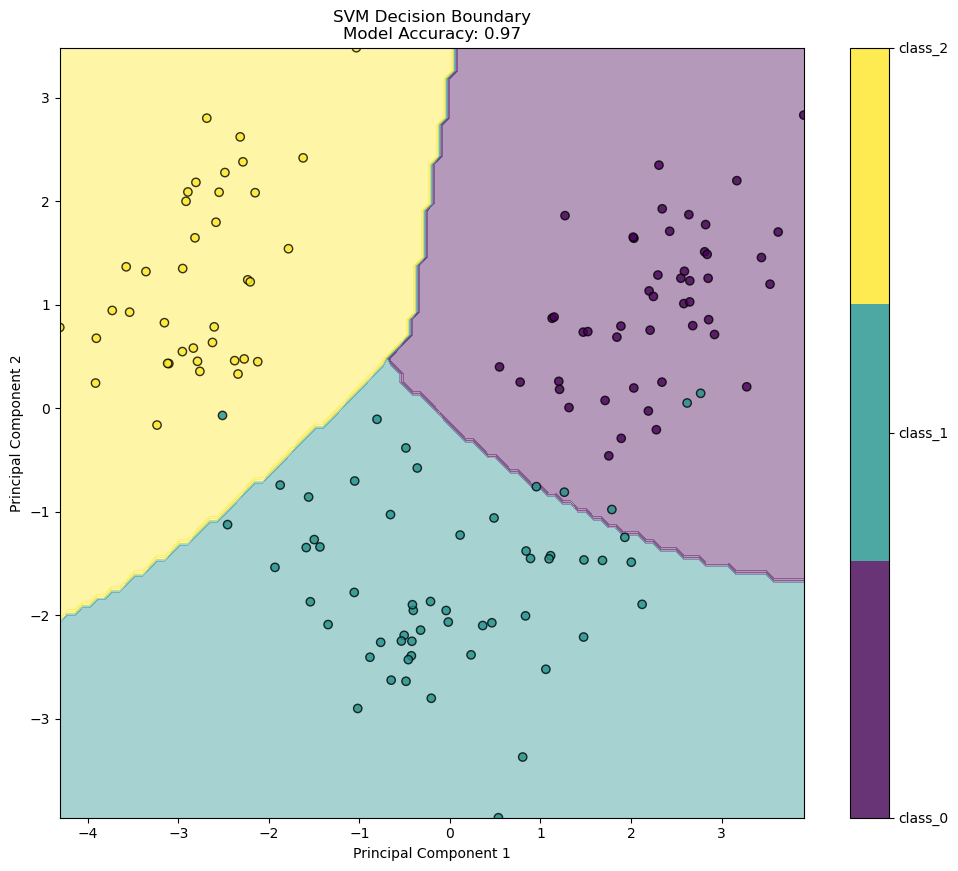

In [24]:
from sklearn.decomposition import PCA
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, title, scaler=None):
    # Reduce the dataset to 2D using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create grid points in pca space
    grid_pca = np.zeros((X_pca.shape[0], X_pca.shape[1]))
    grid_list = []
    for i in range(grid_pca.shape[1]):
        grid_list.append(np.linspace(X_pca[:, i].min(), X_pca[:, i].max(), 100))

    xx, yy = np.meshgrid(grid_list[0], grid_list[1])
    model_input = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])

    # Get predictions from the original model
    Z = model.predict(model_input)
    
    # Handle string class labels if necessary
    if isinstance(Z[0], str):
        unique_classes = np.unique(y)
        class_dict = {class_name: i for i, class_name in enumerate(unique_classes)}
        Z = np.array([class_dict[c] for c in Z])
    elif not isinstance(Z[0], (int, np.integer)):
        Z = Z.astype(int)
    
    # Make sure y is numeric for plotting
    y_numeric = y
    if isinstance(y_numeric, (pd.Series, pd.DataFrame)):
        y_numeric = y_numeric.values
    if isinstance(y_numeric[0], str):
        y_numeric = np.array([class_dict[c] for c in y_numeric])
    
    # Plot
    n_classes = len(np.unique(y_numeric))
    colors = plt.cm.get_cmap('viridis', n_classes)
    
    plt.figure(figsize=(12, 10))
    plt.contourf(xx, yy, Z.reshape(xx.shape), alpha=0.4, cmap=colors) #contourf
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, alpha=0.8, cmap=colors, edgecolor='k')
    
    # Add a colorbar
    cbar = plt.colorbar(scatter, ticks=range(n_classes))
    if hasattr(y, 'unique') and not isinstance(y.iloc[0], (int, np.integer)):
        # If y is a pandas Series with string labels
        cbar.set_ticklabels(np.sort(y.unique()))
    
    ma = results_df.loc[results_df["Model"] == name, "Accuracy"].values[0]
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f"{title}\nModel Accuracy: {ma:.2f}")
    plt.show()
    
    # Return explained variance for interpretation
    return pca.explained_variance_ratio_.sum()

# Usage:
for name, model in models.items():
    if "Forest" in name:
        pass
    else: #scaler.fit_transform(X.values)
        var = plot_decision_boundary(model, X_train_scaled, y_train, f"{name} Decision Boundary", scaler)

## Key Takeaways
- **Logistic Regression**: Fast baseline but limited to linear relationships
- **k-NN**: Simple but computationally heavy for large datasets
- **SVM**: Powerful for complex boundaries but sensitive to scaling
- **Random Forest**: Robust, handles non-linear data, provides feature importance

**Next Steps**: Hyperparameter tuning (GridSearchCV), feature engineering.